In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
reviews_data = pd.read_json(r"C:\Users\user\Documents\UoM\Thesis\data\Clothing_Shoes_and_Jewelry_5.json", lines=True)

# Drop the products whose values are null
reviews_data = reviews_data[reviews_data['reviewText'].notna()]

ratings = []
for index,entry in enumerate(reviews_data['overall']):
    if entry == 1.0 or entry == 2.0:
        ratings.append(-1)
    elif entry == 3.0:
        ratings.append(0)
    elif entry == 4.0 or entry == 5.0:
        ratings.append(1)

# Keep only the review text and the grade
reviews_data = reviews_data[['reviewText']]
reviews_data['rating'] = ratings

# WORDCLOUDS FOR ALL REVIEWS

In [8]:
def generate_word_cloud(data, title, colorMap):
    reviewString = " ".join(data)

    stop = set(STOPWORDS)
    stop.add('wear')
    stop.add('shoe')
    stop.add('size')
    stop.add('fit')
    stop.add('look')
    stop.add('one')
    stop.add('will')
    
    wc = WordCloud(height = 500, width = 1000, stopwords = stop, max_words=100, colormap = colorMap).generate(reviewString)
    plt.figure(figsize=(10,5))
    img = plt.imshow(wc,cmap='gray')
    img.set_cmap('hot')
    plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)
    
def get_indexes_from_file(fileName):
    data = []
    with open(fileName) as f:
        for line in f:
            data.append(int(line.rstrip("\n")))
    return data

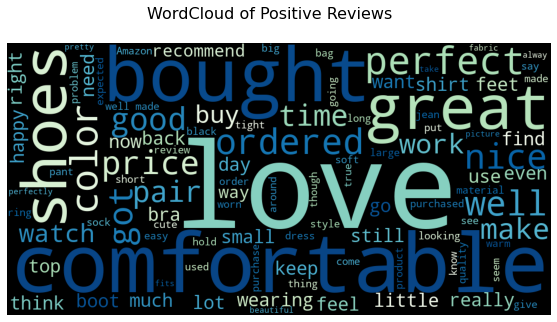

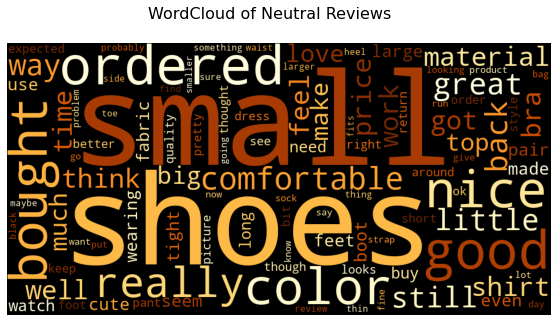

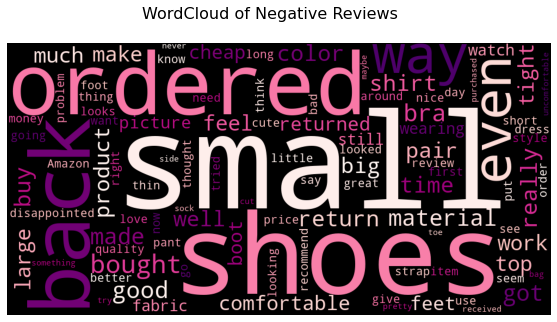

In [9]:
positive_reviews = reviews_data['reviewText'][reviews_data['rating'] == 1]
generate_word_cloud(positive_reviews, "WordCloud of Positive Reviews", colorMap='GnBu')

neutral_reviews = reviews_data['reviewText'][reviews_data['rating'] == 0]
generate_word_cloud(neutral_reviews, "WordCloud of Neutral Reviews", colorMap='YlOrBr')

negative_reviews = reviews_data['reviewText'][reviews_data['rating'] == -1]
generate_word_cloud(negative_reviews, "WordCloud of Negative Reviews", colorMap='RdPu')

In [1]:
# Generate wordcloud for those reviews who have been classified as positive but they are negative
negativeActual_positivePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_PositivePredicted_NegativeActual.txt")
negativeActual_positivePredicted_reviews = reviews_data[reviews_data.index.isin(negativeActual_positivePredicted_indexes)]
generate_word_cloud(negativeActual_positivePredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as positive but they are negative", colorMap='RdPu')

# Generate wordcloud for those reviews who have been classified as neutral but they are negative
negativeActual_neutralPredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NeutralPredicted_NegativeActual.txt")
negativeActual_neutralPredicted_reviews = reviews_data[reviews_data.index.isin(negativeActual_neutralPredicted_indexes)]
generate_word_cloud(negativeActual_neutralPredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as neutral but they are negative", colorMap='RdPu')

NameError: name 'get_indexes_from_file' is not defined

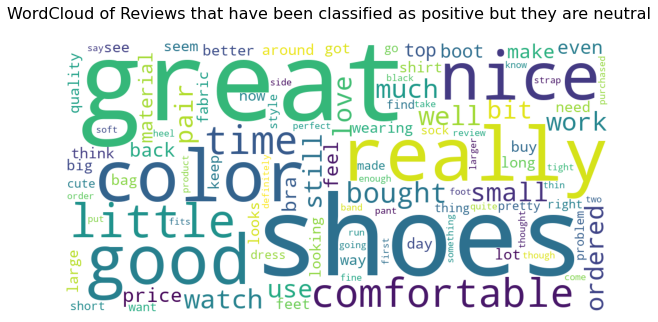

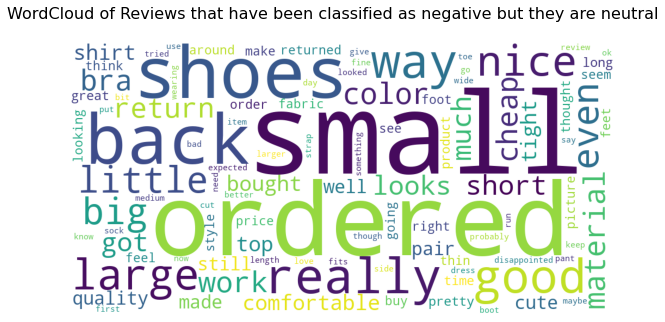

In [24]:
# Generate wordcloud for those reviews who have been classified as positive but they are neutral
neutralActual_positivePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_PositivePredicted_NeutralActual.txt")
neutralActual_positivePredicted_reviews = reviews_data[reviews_data.index.isin(neutralActual_positivePredicted_indexes)]
generate_word_cloud(neutralActual_positivePredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as positive but they are neutral")

# Generate wordcloud for those reviews who have been classified as negative but they are neutral
neutralActual_negativePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NegativePredicted_NeutralActual.txt")
neutralActual_negativePredicted_reviews = reviews_data[reviews_data.index.isin(neutralActual_negativePredicted_indexes)]
generate_word_cloud(neutralActual_negativePredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as negative but they are neutral")

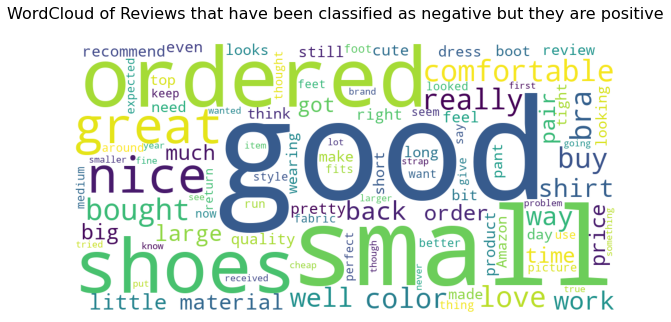

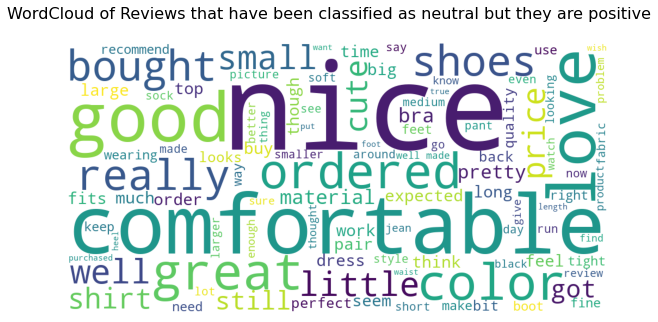

In [25]:
# Generate wordcloud for those reviews who have been classified as negative but they are positive
positiveActual_negativePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NegativePredicted_PositiveActual.txt")
positiveActual_negativePredicted_reviews = reviews_data[reviews_data.index.isin(positiveActual_negativePredicted_indexes)]
generate_word_cloud(positiveActual_negativePredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as negative but they are positive")

# Generate wordcloud for those reviews who have been classified as neutral but they are positive
positiveActual_neutralPredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NeutralPredicted_PositiveActual.txt")
positiveActual_neutralPredicted_reviews = reviews_data[reviews_data.index.isin(positiveActual_neutralPredicted_indexes)]
generate_word_cloud(positiveActual_neutralPredicted_reviews['reviewText'], "WordCloud of Reviews that have been classified as neutral but they are positive")

# WORDCLOUDS KEEPING ONLY THE ADJECTIVES

In [11]:
import nltk 

def generate_word_cloud_adjectives(data, title, colorMap):
    reviewString = " ".join(data)

    stop = set(STOPWORDS)
    stop.extend(['good'])
    
    tokens = nltk.word_tokenize(reviewString)
    tags = nltk.pos_tag(tokens)
    adjectives = [word for word,pos in tags if (pos == 'JJ')]
    
    finalString = " ".join(adjectives)
    
    wc = WordCloud(height = 500, width = 1000, colormap = colorMap, stopwords = stop, max_words=100).generate(finalString)
    plt.figure(figsize=(10,5))
    img = plt.imshow(wc,cmap='gray')
    img.set_cmap('hot')
    plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.savefig('pict.png',bbox_inches='tight', pad_inches = 0)
    
def get_indexes_from_file(fileName):
    data = []
    with open(fileName) as f:
        for line in f:
            data.append(int(line.rstrip("\n")))
    return data

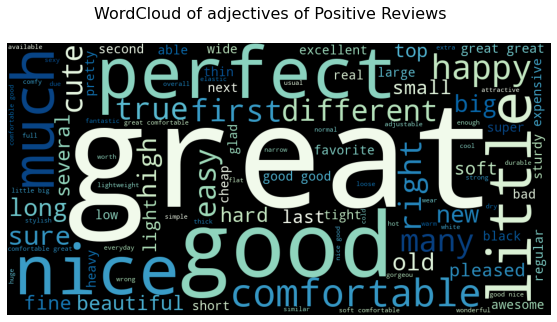

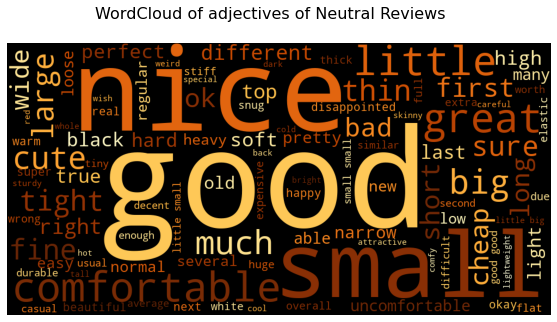

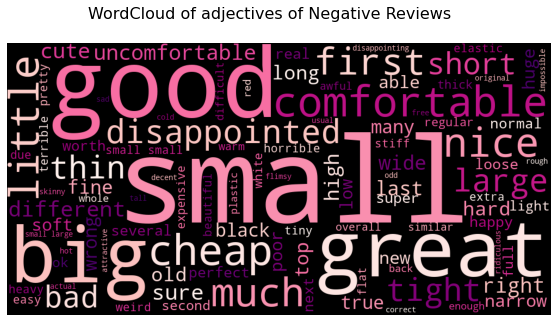

In [12]:
positive_reviews = reviews_data['reviewText'][reviews_data['rating'] == 1]
generate_word_cloud_adjectives(positive_reviews, "WordCloud of adjectives of Positive Reviews", colorMap='GnBu')

neutral_reviews = reviews_data['reviewText'][reviews_data['rating'] == 0]
generate_word_cloud_adjectives(neutral_reviews, "WordCloud of adjectives of Neutral Reviews", colorMap='YlOrBr')

negative_reviews = reviews_data['reviewText'][reviews_data['rating'] == -1]
generate_word_cloud_adjectives(negative_reviews, "WordCloud of adjectives of Negative Reviews", colorMap='RdPu')

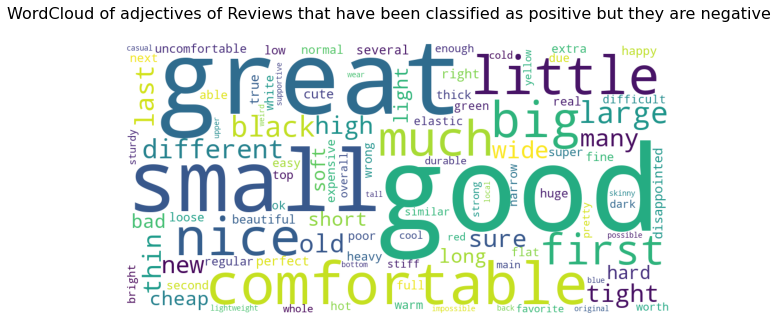

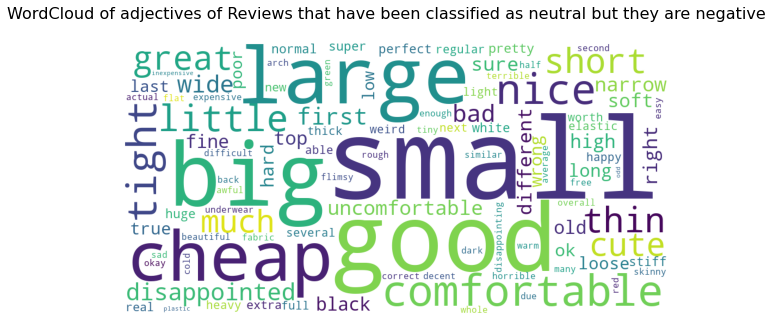

In [30]:
# Generate wordcloud of adjectives for those reviews who have been classified as positive but they are negative
negativeActual_positivePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_PositivePredicted_NegativeActual.txt")
negativeActual_positivePredicted_reviews = reviews_data[reviews_data.index.isin(negativeActual_positivePredicted_indexes)]
generate_word_cloud_adjectives(negativeActual_positivePredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as positive but they are negative")

# Generate wordcloud of adjectives for those reviews who have been classified as neutral but they are negative
negativeActual_neutralPredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NeutralPredicted_NegativeActual.txt")
negativeActual_neutralPredicted_reviews = reviews_data[reviews_data.index.isin(negativeActual_neutralPredicted_indexes)]
generate_word_cloud_adjectives(negativeActual_neutralPredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as neutral but they are negative")

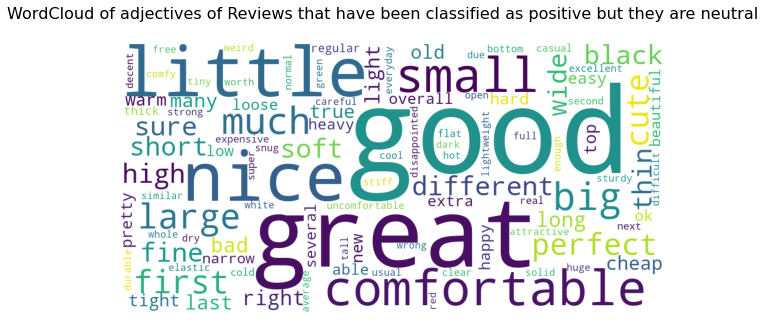

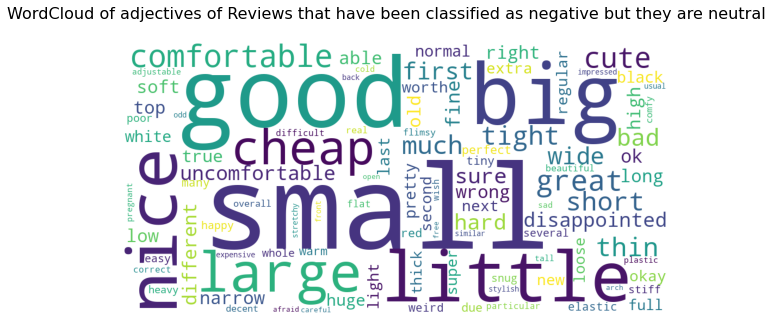

In [31]:
# Generate wordcloud of adjectives for those reviews who have been classified as positive but they are neutral
neutralActual_positivePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_PositivePredicted_NeutralActual.txt")
neutralActual_positivePredicted_reviews = reviews_data[reviews_data.index.isin(neutralActual_positivePredicted_indexes)]
generate_word_cloud_adjectives(neutralActual_positivePredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as positive but they are neutral")

# Generate wordcloud of adjectives for those reviews who have been classified as negative but they are neutral
neutralActual_negativePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NegativePredicted_NeutralActual.txt")
neutralActual_negativePredicted_reviews = reviews_data[reviews_data.index.isin(neutralActual_negativePredicted_indexes)]
generate_word_cloud_adjectives(neutralActual_negativePredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as negative but they are neutral")

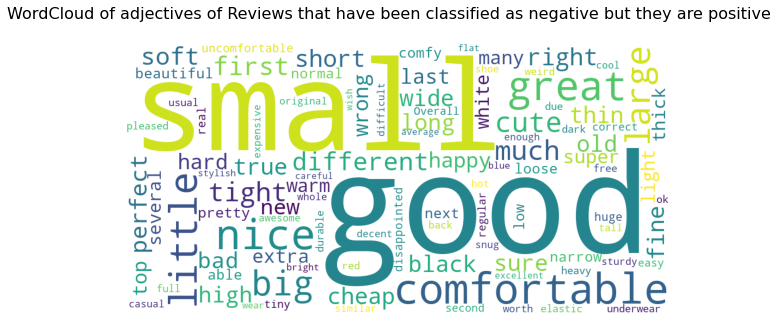

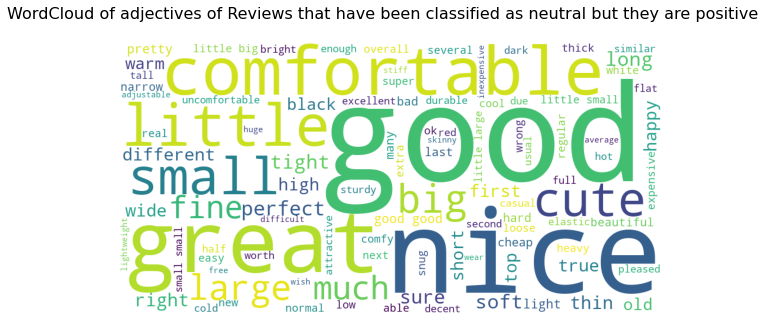

In [32]:
# Generate wordcloud of adjectives for those reviews who have been classified as negative but they are positive
positiveActual_negativePredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NegativePredicted_PositiveActual.txt")
positiveActual_negativePredicted_reviews = reviews_data[reviews_data.index.isin(positiveActual_negativePredicted_indexes)]
generate_word_cloud_adjectives(positiveActual_negativePredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as negative but they are positive")

# Generate wordcloud of adjectives for those reviews who have been classified as neutral but they are positive
positiveActual_neutralPredicted_indexes = get_indexes_from_file("indexes/SVM_HashingVectorizer_Oversampling_NeutralPredicted_PositiveActual.txt")
positiveActual_neutralPredicted_reviews = reviews_data[reviews_data.index.isin(positiveActual_neutralPredicted_indexes)]
generate_word_cloud_adjectives(positiveActual_neutralPredicted_reviews['reviewText'], "WordCloud of adjectives of Reviews that have been classified as neutral but they are positive")